In [1]:
install.packages("readxl")
library(readxl)


Warning message in install.packages("readxl"):
“installation of package ‘readxl’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [13]:
# Define the file path
file_path <- "./data/Summary and Keyphrases.xlsx"

# Read the sheet into a data frame
data <- read_excel(file_path, sheet = "Summary and Key Phrases")

# Backup the data frame by copying it
df <- data


Warning message:
“Removed 2 rows containing missing values or values outside the scale
range (`geom_bar()`).”


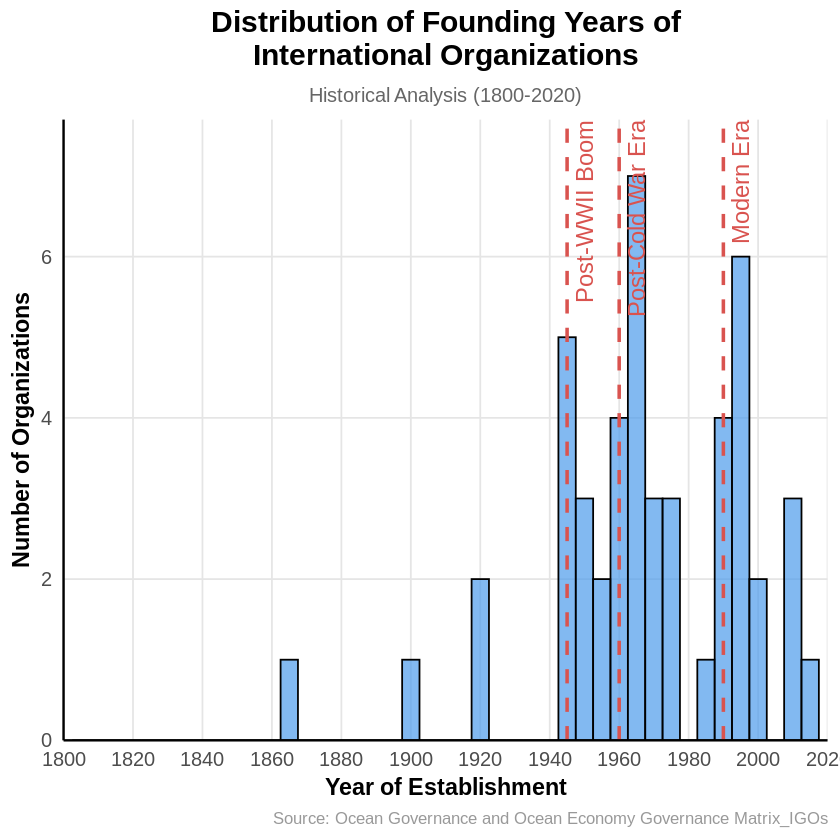

In [39]:
library(ggplot2)

# Function to create the plot
create_founding_years_plot <- function(df) {
  # Input validation
  if (!"Year" %in% colnames(df)) {
    stop("Data frame must contain a 'Year' column")
  }
  
  # Convert Year to numeric and handle potential NAs
  df$Year <- as.numeric(as.character(df$Year))
  df <- df[!is.na(df$Year), ]  # Remove NA values
  
  # Define color palette
  colors <- list(
    hist_fill = "#4C9BEB",
    line = "#D9534F",
    grid = "gray90"
  )
  
  # Key historical markers
  markers <- data.frame(
    year = c(1945, 1960, 1990),
    label = c("Post-WWII Boom", "Post-Cold War Era", "Modern Era")
  )
  
  # Create the plot
  plot <- ggplot(df, aes(x = Year)) +
    # Histogram with improved aesthetics
    geom_histogram(binwidth = 5, 
                  fill = colors$hist_fill, 
                  color = "black", 
                  alpha = 0.7,
                  linewidth = 0.5) +
    
    # Vertical lines for historical markers
    geom_vline(data = markers,
              aes(xintercept = year),
              linetype = "dashed",
              color = colors$line,
              linewidth = 1) +
    
    # Annotations using the markers data frame
    geom_text(data = markers,
              aes(x = year, label = label),
              y = Inf,
              angle = 90,
              vjust = 1.5,
              hjust = 1,
              color = colors$line,
              size = 5) +
    
    # Labels with improved formatting
    labs(title = "Distribution of Founding Years of\nInternational Organizations",
         subtitle = "Historical Analysis (1800-2020)",
         x = "Year of Establishment",
         y = "Number of Organizations",
         caption = "Source: Ocean Governance and Ocean Economy Governance Matrix_IGOs") +
    
    # Enhanced theme
    theme_minimal(base_size = 15) +
    theme(
      plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 10)),
      plot.subtitle = element_text(hjust = 0.5, size = 12, color = "gray40"),
      plot.caption = element_text(size = 10, color = "gray60"),
      axis.title = element_text(size = 14, face = "bold"),
      axis.text = element_text(size = 12),
      axis.line = element_line(color = "black"),
      panel.grid.major = element_line(color = colors$grid, linewidth = 0.5),
      panel.grid.minor = element_blank(),
      plot.background = element_rect(fill = "white", color = NA),
      panel.background = element_rect(fill = "white", color = NA)
    ) +
    
    # Scale adjustments
    scale_x_continuous(breaks = seq(1800, 2020, by = 20),
                      limits = c(1800, 2020),
                      expand = c(0, 0)) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1)))

  return(plot)
}

# Error handling wrapper for saving the plot
save_plot <- function(plot, filename = "IGO_founding_years_plot.png") {
  tryCatch({
    ggsave(filename, 
           plot = plot, 
           width = 16, 
           height = 8, 
           dpi = 300,
           bg = "white")
    message("Plot successfully saved as ", filename)
  }, error = function(e) {
    warning("Failed to save plot: ", e$message)
  })
}

# Usage example (uncomment and replace 'your_data' with actual data frame)
plot <- create_founding_years_plot(df)
print(plot)
# save_plot(plot)

In [22]:
# library(ggplot2)

# # Convert Year column to numeric (if necessary)
# df$Year <- as.numeric(df$Year)

# # Create the plot
# plot <- ggplot(df, aes(x = Year)) +
#   geom_histogram(binwidth = 5, fill = "#4C9BEB", color = "black", alpha = 0.7) +  # Professional color with transparency
#   geom_vline(xintercept = c(1945, 1960, 1990), linetype = "dashed", color = "#D9534F", linewidth = 1) +  # Use linewidth for line thickness
#   annotate("text", x = 1945, y = 4, label = "Post-WWII Boom", color = "#D9534F", angle = 90, vjust = -0.5, size = 5) +  # Clear annotation with increased size
#   annotate("text", x = 1960, y = 4, label = "Post-Cold War Era", color = "#D9534F", angle = 90, vjust = -0.5, size = 5) +  # Clear annotation
#   annotate("text", x = 1990, y = 4, label = "Modern Era", color = "#D9534F", angle = 90, vjust = -0.5, size = 5) +  # Clear annotation
#   labs(title = "Distribution of Founding Years of International Organizations",
#        x = "Year of Establishment",
#        y = "Number of Organizations") +
#   theme_minimal(base_size = 15) +  # Larger base font size for readability
#   theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),  # Centered and bold title
#         axis.title = element_text(size = 14, face = "bold"),
#         axis.text = element_text(size = 12),
#         panel.grid.major = element_line(color = "gray90"),  # Lighter grid for clarity
#         panel.grid.minor = element_blank()) +  # Remove minor grid lines for a cleaner look
#   coord_cartesian(xlim = c(1800, 2020))  # Limit x-axis to relevant years for focus

# # Save the plot to a high-resolution file
# ggsave("founding_years_plot.png", plot = plot, width = 10, height = 6, dpi = 300)


### Purpose of the Plot:
The histogram will show the **distribution of founding years** of these international institutions over time. This allows us to understand how these organizations have been established across different periods.

### Plot Interpretation:
1. **X-axis (Year)**: This will represent the **year** in which the organizations were founded.
2. **Y-axis (Number of Organizations)**: This will show how many organizations were founded in a given period (based on the binwidth you selected, which is 10 years).

### Insights You May Observe from the Plot:
- **Early 1900s (Pre-World War I and World War I period)**: The organizations that were founded in this period (e.g., ITU in 1865, ICES in 1902) would appear to be part of the earlier cluster. These early organizations may focus on telecommunications, scientific research, and international cooperation during that era.
  
- **Post-World War II Boom (1940s-1950s)**: A notable concentration of organizations was founded in the **post-WWII period**, between **1944 and 1948**, including major international organizations such as the **WBG (World Bank Group)**, **IMF (International Monetary Fund)**, **FAO (Food and Agriculture Organization)**, **WHO (World Health Organization)**, and others. This period corresponds to a surge in international cooperation, rebuilding efforts, and the establishment of many multilateral institutions.
  
- **1960s-1980s**: The number of organizations seems to stabilize in the **1960s to 1980s**, though there is still a steady founding rate, such as **UNICEF (1953)**, **UNEP (1972)**, **WFP (1961)**, and others. The development of global health, environmental, and peacekeeping organizations is reflected in this period.

- **Recent Years (1990s-2010s)**: In the **1990s and beyond**, a smaller number of organizations were founded, such as **UNODC (1997)**, **UN-Women (2010)**, **IPBES (2012)**, and others. This may reflect a more specialized role in addressing newer global challenges like climate change, gender equality, and sustainable development.

### Possible Trends:
- There is a **concentration of organizations founded** between **1944 and 1950**, which is likely tied to the aftermath of **World War II**, with the establishment of key organizations that shaped the modern international system.
  
- There may be a **slowdown in the creation of new organizations** in the last few decades, which could suggest that existing organizations are expanding their mandates or focusing on specific issues (e.g., environmental protection, human rights) rather than the creation of new ones.

- The **1990s and 2000s** saw the formation of institutions like the **UNFCCC (1992)**, which reflects a growing global focus on environmental and climate-related issues.


In [40]:
library(FactoMineR)
library(factoextra)

# Assuming 'df' is your dataset with categorical columns
mca_result <- MCA(df[, c("Spatial_Jurisdiction", "Subject_Matter_Jurisdiction", "Defined_Objectives", "Strategies")], graph = FALSE)
fviz_mca_biplot(mca_result, repel = TRUE, ggtheme = theme_minimal()) +
  labs(title = "MCA Biplot of IGOs and Governance Attributes")

ERROR: Error in library(FactoMineR): there is no package called ‘FactoMineR’
